In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

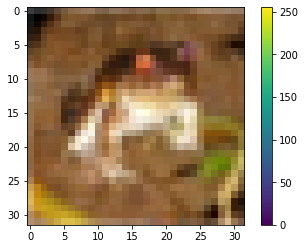

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

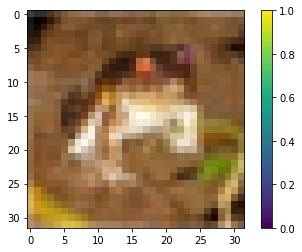

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

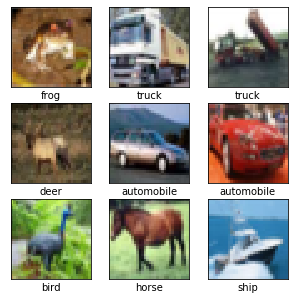

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
model = models.Sequential()

In [8]:
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 10

history = model.fit(train_images, train_labels, epochs=EPOCHS, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 77us/sample - loss: 1.9230 - accuracy: 0.3086 - val_loss: 1.8549 - val_accuracy: 0.3165
Epoch 2/10
50000/50000 [==============================] - 3s 65us/sample - loss: 1.8041 - accuracy: 0.3568 - val_loss: 1.7702 - val_accuracy: 0.3636
Epoch 3/10
50000/50000 [==============================] - 3s 64us/sample - loss: 1.7532 - accuracy: 0.3771 - val_loss: 1.7386 - val_accuracy: 0.3860
Epoch 4/10
50000/50000 [==============================] - 3s 64us/sample - loss: 1.7316 - accuracy: 0.3852 - val_loss: 1.7020 - val_accuracy: 0.3954
Epoch 5/10
50000/50000 [==============================] - 3s 63us/sample - loss: 1.7183 - accuracy: 0.3902 - val_loss: 1.7109 - val_accuracy: 0.3860
Epoch 6/10
50000/50000 [==============================] - 3s 62us/sample - loss: 1.7028 - accuracy: 0.3943 - val_loss: 1.6894 - val_accuracy: 0.4003
Epoch 7/10
50000/50000 [==============================] 

In [10]:
import sys; sys.path.append('..')
from common.plot_util import eval_metric

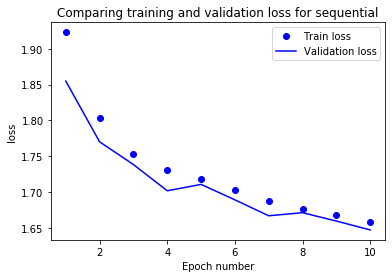

In [11]:
%matplotlib inline
eval_metric(model,history, 'loss',EPOCHS)

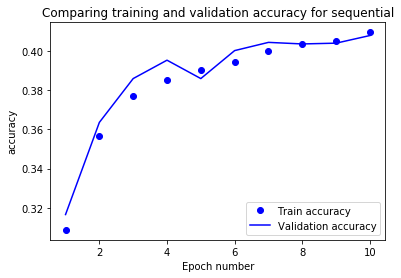

In [12]:
eval_metric(model,history, 'accuracy',EPOCHS)

In [13]:
#make predictions
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([0.04518426, 0.02873701, 0.07423595, 0.17740166, 0.02814624,
       0.16669983, 0.06949316, 0.00265824, 0.39828596, 0.00915763],
      dtype=float32)

In [15]:
import numpy as np
np.argmax(predictions[0])

8

In [16]:
#plot predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, img = predictions_array, img[i]
  true_label_local =   true_label[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label_local:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array)
                                ,
                                class_names[true_label_local]
                                ),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label2 =   true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label2].set_color('green')

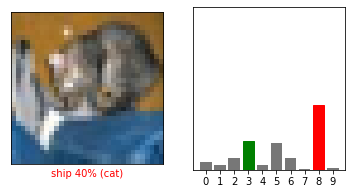

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

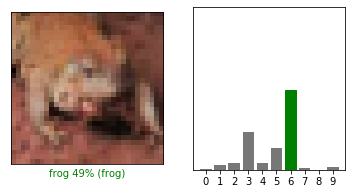

In [18]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()